In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
filename1= 'title.basics.tsv.gz'
filename2 = 'title.episode.tsv.gz'

In [7]:
dftv = pd.read_table(filename1,compression='gzip',sep='\t', na_values='\\N')
dfeps = pd.read_table(filename2,compression='gzip',sep='\t', na_values='\\N')

print(dftv.head())
print(dfeps.head())

/Users/claireramming/Applications/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult  startYear  endYear runtimeMinutes                    genres  
0        0     1894.0      NaN              1         Documentary,Short  
1        0     1892.0      NaN              5           Animation,Short  
2        0     1892.0      NaN              4  Animation,Comedy,Romance  
3        0     1892.0      NaN            NaN           Animation,Short  
4        0     1893.0      NaN              1                     Short  
      tconst parentTconst  seasonNumber  episodeNumber
0  tt0041951    tt0041038           1.0            9.0
1

In [8]:
#df.titleType.unique()
# & (df.startYear > 1967)
#limit to just TV series info from last 50 years
tv = dftv[(dftv.titleType == 'tvSeries') & (dftv.startYear > 1967)]

#reset index
tv.reset_index(inplace=True)

#limit to only needed columns
tv=tv[['tconst', 'primaryTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres']] 

#fill NA with zero so we can convert to integers
tv.fillna(0, inplace=True)
#change data types
tv = tv.astype({'startYear':np.int64, 'endYear':np.int64, 'runtimeMinutes':np.int64})
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131293 entries, 0 to 131292
Data columns (total 7 columns):
tconst            131293 non-null object
primaryTitle      131293 non-null object
isAdult           131293 non-null int64
startYear         131293 non-null int64
endYear           131293 non-null int64
runtimeMinutes    131293 non-null int64
genres            131293 non-null object
dtypes: int64(4), object(3)
memory usage: 7.0+ MB


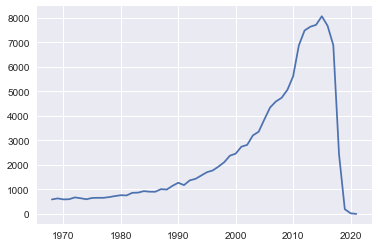

In [9]:
p = plt.plot(tv.tconst.groupby(tv.startYear).count())
plt.show()

In [11]:
tv.genres.replace(0,'None', inplace=True)
tv.tconst.groupby(tv.genres).count().head()

genres
Action                        805
Action,Adult                    3
Action,Adult,Horror             1
Action,Adventure               44
Action,Adventure,Animation    589
Name: tconst, dtype: int64

In [31]:
from collections import defaultdict
from collections import Counter

genrecount= Counter()
genres_dict = defaultdict(list)
for index, genres in tv.genres.iteritems():
    str(genres)
    genres = genres.split(',')
    for genre in genres:
        genrecount[genre] += 1
        genres_dict[index1].append(genre)

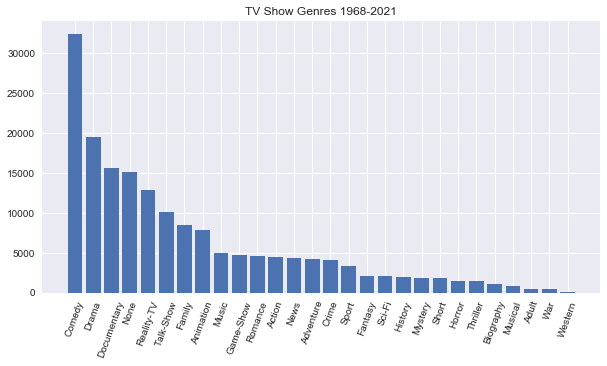

In [40]:
#barplot of genres
labels, values = zip(*genrecount.most_common())
indexes = np.arange(len(labels))

plt.figure(figsize=(10,5))
plt.title('TV Show Genres 1968-2021')

plt.bar(indexes, values)
plt.xticks(indexes, labels, rotation=70)
plt.show()

In [18]:
#find out how many seasons for each show, maybe then do breakdown by genre/histogram by genre
#number of comedies by year? overall genres by year? Might find interesting peaks
#get some interactive graphs going with bokeh! sliders!
eps = dfeps.dropna()
eps.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1.0,9.0
1,tt0042816,tt0989125,1.0,17.0
3,tt0043426,tt0040051,3.0,42.0
4,tt0043631,tt0989125,2.0,16.0
5,tt0043693,tt0989125,2.0,8.0


In [21]:
pd.DataFrame(eps.seasonNumber.groupby(eps.parentTconst).max())

pandas.core.series.Series